<a href="https://colab.research.google.com/github/saraMuay/Bank-Marketing-campaign/blob/main/MarketingForBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset =pd.read_csv('bank-markting.csv', sep=';')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
dataset.shape

(41188, 21)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

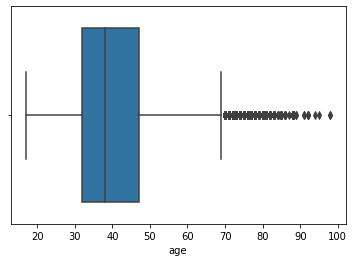

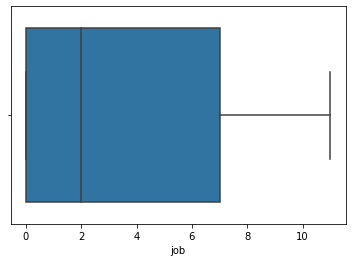

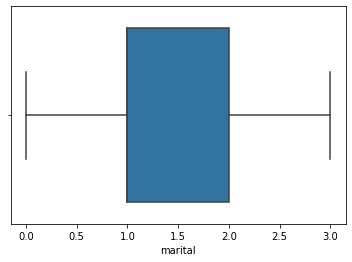

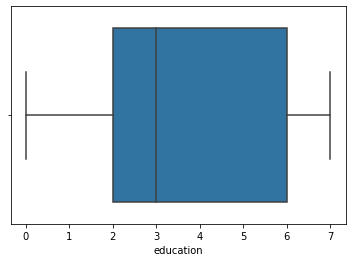

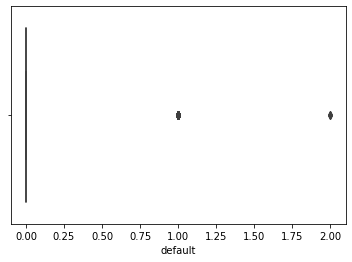

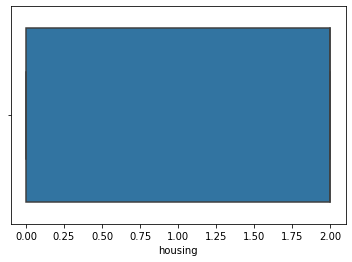

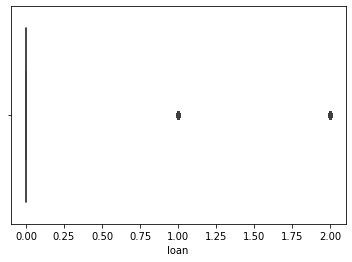

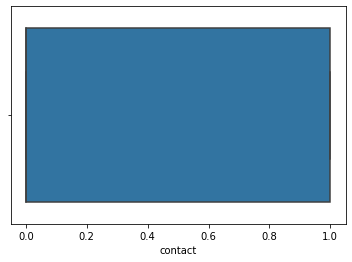

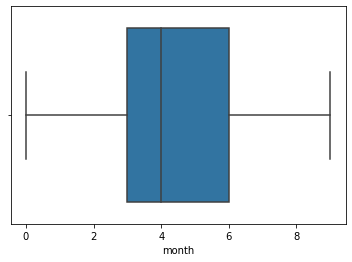

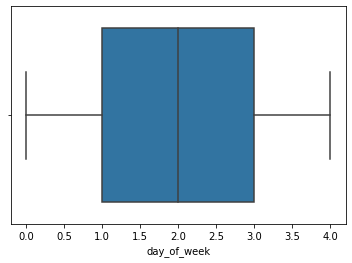

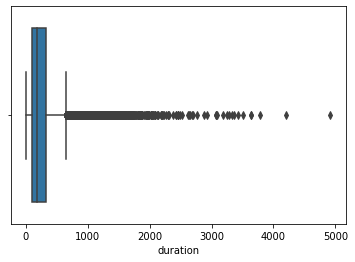

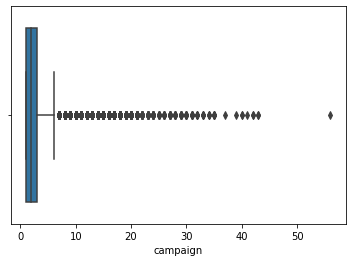

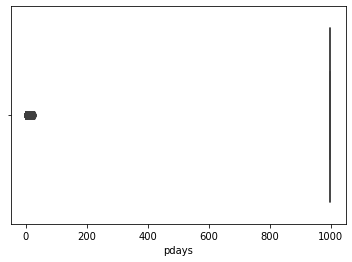

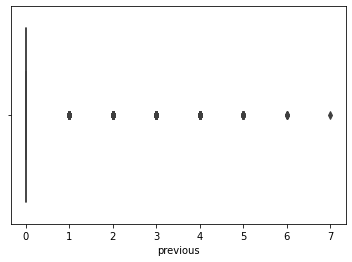

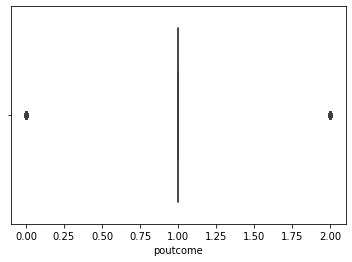

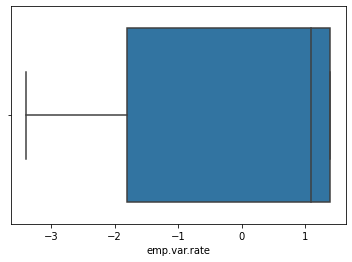

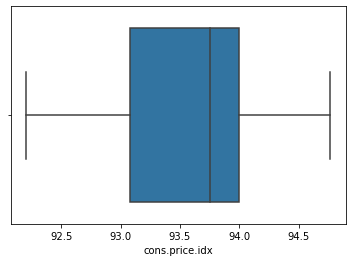

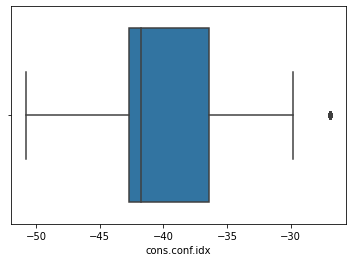

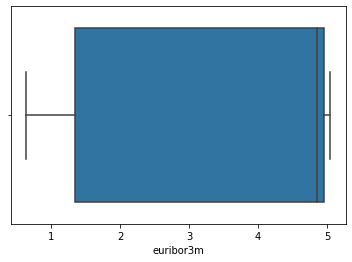

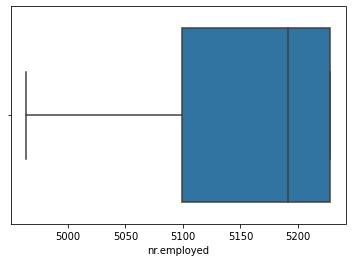

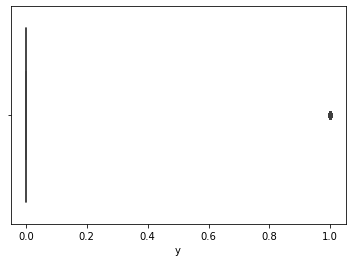

In [ ]:
import matplotlib.pyplot as plt

def detect_outliers(df):
    for i in df.columns:
        if(df[i].dtype == 'int64'):
            sns.boxplot(df[i])
            plt.show()
            
        elif(df[i].dtype == 'float64'):
            sns.boxplot(df[i])
            plt.show()
            
detect_outliers(dataset)

In [ ]:
features=[x for x in dataset.columns if dataset[x].dtype=="object"]
unique_values=[]
Nunique_values= []
for col in features:
  unique_values.append(dataset[col].unique())
  Nunique_values.append(dataset[col].nunique())

nunique_values = pd.DataFrame({'Columns' : features, 'Number_of_Unique' : Nunique_values})
nunique_values

,Columns,Number_of_Unique
0,job,12
1,marital,4
2,education,8
3,default,3
4,housing,3
5,loan,3
6,contact,2
7,month,10
8,day_of_week,5
9,poutcome,3


In [ ]:
data_uniq= pd.DataFrame({'columns':features,
                         'unique values': unique_values })
data_uniq

,columns,unique values
0,job,"[housemaid, services, admin., blue-collar, tec..."
1,marital,"[married, single, divorced, unknown]"
2,education,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
3,default,"[no, unknown, yes]"
4,housing,"[no, yes, unknown]"
5,loan,"[no, yes, unknown]"
6,contact,"[telephone, cellular]"
7,month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
8,day_of_week,"[mon, tue, wed, thu, fri]"
9,poutcome,"[nonexistent, failure, success]"


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in features:
    if col in dataset.columns:
        i = dataset.columns.get_loc(col)
        dataset.iloc[:,i] = dataset.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [ ]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


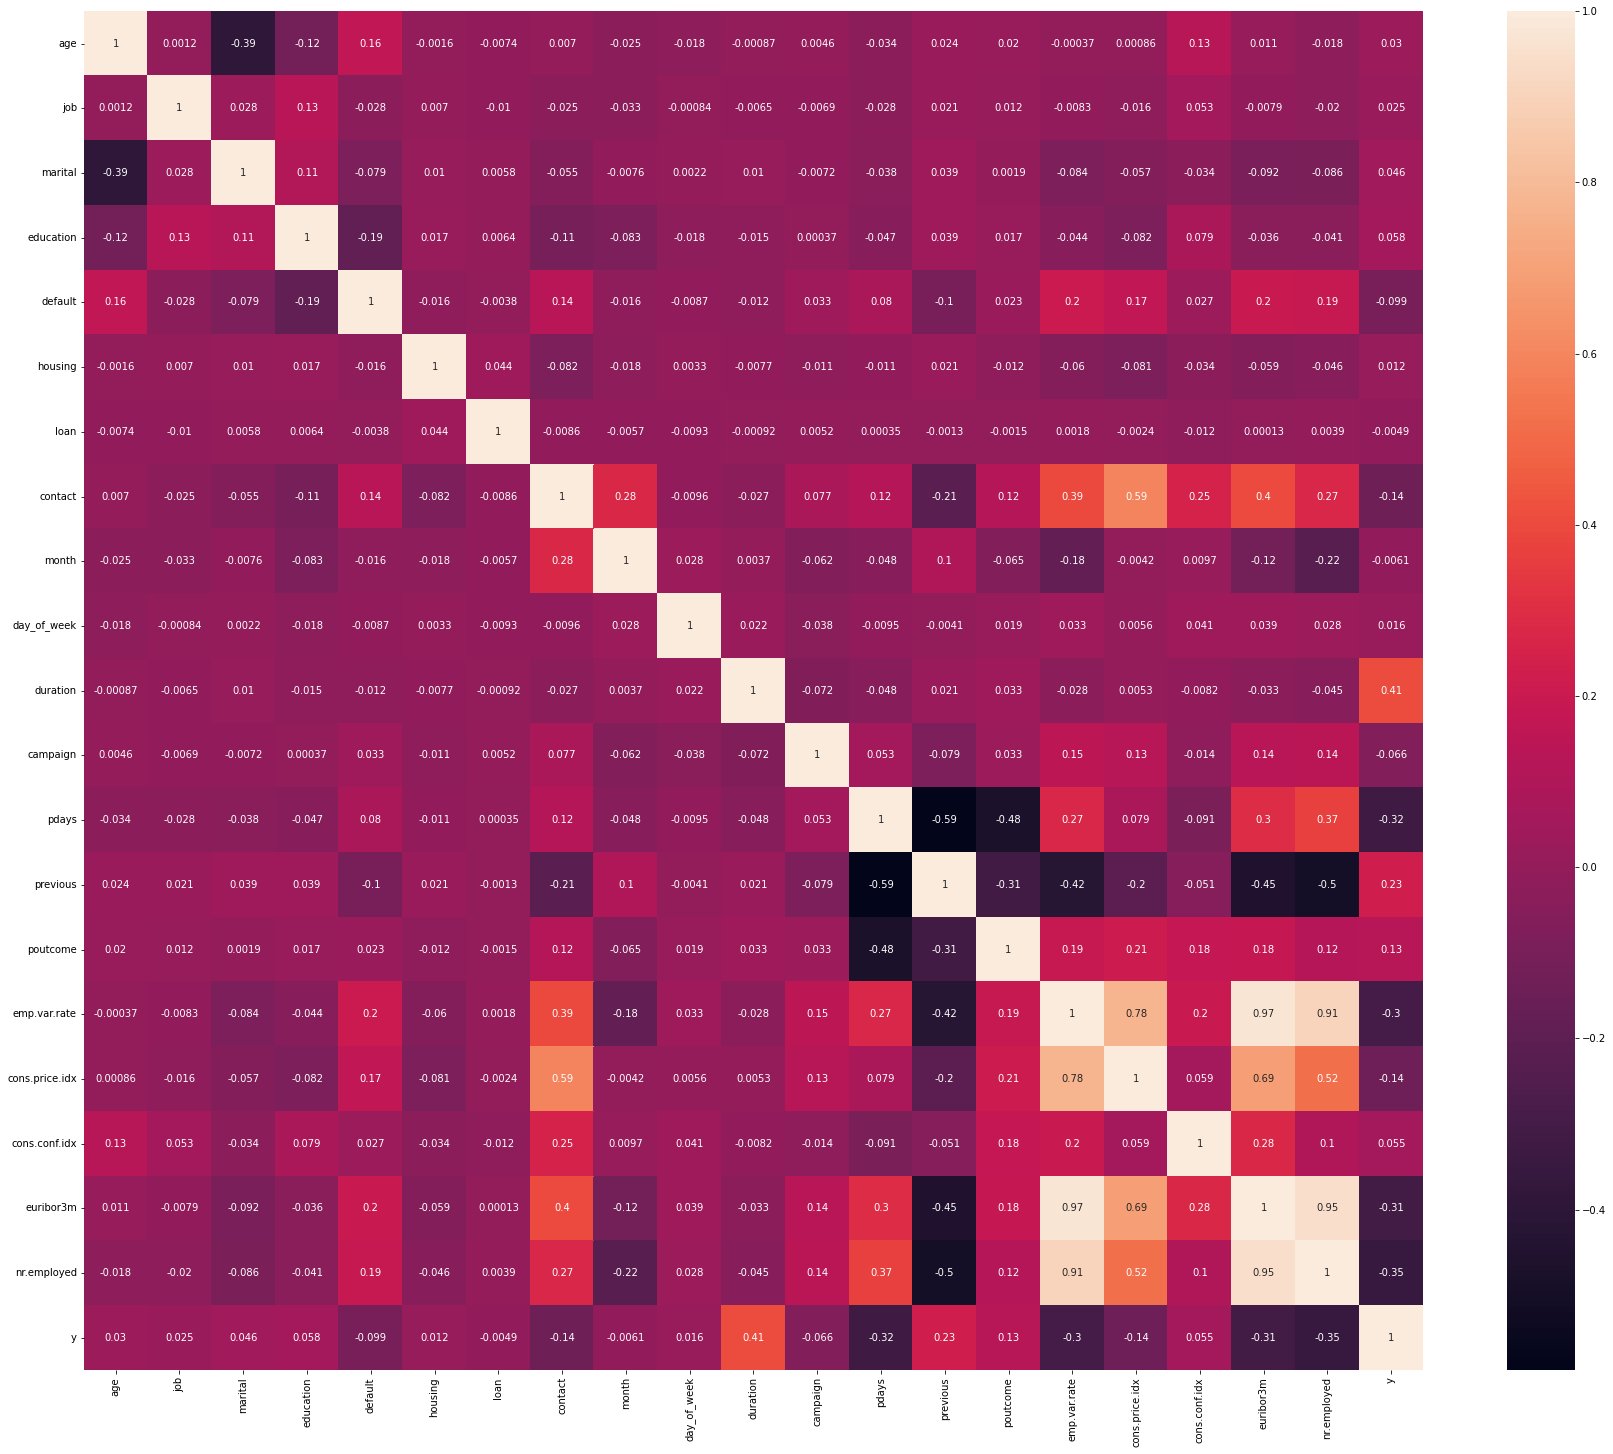

In [ ]:
#dataset.corr().style.background_gradient(cmap='cividis')
plt.figure(figsize=(30,25))
sns.heatmap(dataset.corr(), annot=True)

In [ ]:
X= dataset.drop(columns=['y'])
y = dataset.y

In [ ]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:
from collections import Counter
Counter(y)

Counter({0: 36548, 1: 4640})

In [ ]:
print(X.shape)
print(y.shape)

(41188, 20)
(41188,)


In [ ]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)

In [ ]:
print(X_res.shape)
print(y_res.shape)

(73096, 20)
(73096,)


In [ ]:
Counter(y_res)

Counter({0: 36548, 1: 36548})

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)


In [ ]:
X_train

array([[ 3.10000000e+01,  1.00000000e+00,  1.00000000e+00, ...,
        -3.14000000e+01,  8.73000000e-01,  5.07620000e+03],
       [ 2.75125632e+01,  1.00837548e+00,  2.00000000e+00, ...,
        -4.08000000e+01,  1.26678978e+00,  5.07620000e+03],
       [ 2.90000000e+01,  7.00000000e+00,  1.00000000e+00, ...,
        -4.20000000e+01,  4.07600000e+00,  5.19580000e+03],
       ...,
       [ 2.16576666e+01,  5.34773351e+00,  1.66846669e+00, ...,
        -4.68016200e+01,  1.33151514e+00,  5.09910000e+03],
       [ 5.00000000e+01,  2.00000000e+00,  1.00000000e+00, ...,
        -3.64000000e+01,  4.85700000e+00,  5.19100000e+03],
       [ 2.73058919e+01,  0.00000000e+00,  2.00000000e+00, ...,
        -4.70082324e+01,  1.39062308e+00,  5.09910000e+03]])

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32950, 20)
(32950,)
(8238, 20)
(8238,)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

RandomForestClassifier accuracy : %95.513
Accuracy by k-Fold Cross Validation: 95.42 %
Standard Deviation: 0.23 %


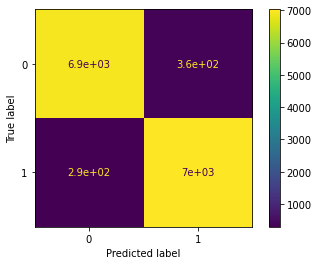

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier( )
RF_classifier.fit(X_train, y_train)
Y_pred= RF_classifier.predict(X_test)
plot_confusion_matrix(RF_classifier,X_test,y_test)
print( "RandomForestClassifier accuracy : %" + str(np.round(accuracy_score(y_test,Y_pred)*100,3)))

accuracies = cross_val_score(estimator = RF_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy by k-Fold Cross Validation: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

GradientBoostingClassifier accuracy : %94.617
Accuracy by k-Fold Cross Validation: 94.61 %
Standard Deviation: 0.30 %


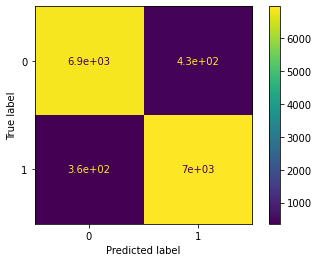

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBoost_classifier = GradientBoostingClassifier( )
GBoost_classifier.fit(X_train, y_train)
Y_pred= GBoost_classifier.predict(X_test)
plot_confusion_matrix(GBoost_classifier,X_test,y_test)
print( "GradientBoostingClassifier accuracy : %" + str(np.round(accuracy_score(y_test,Y_pred)*100,3)))

accuracies = cross_val_score(estimator = GBoost_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy by k-Fold Cross Validation: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

AdaBoostClassifier accuracy : %93.276
Accuracy by k-Fold Cross Validation: 93.27 %
Standard Deviation: 0.37 %


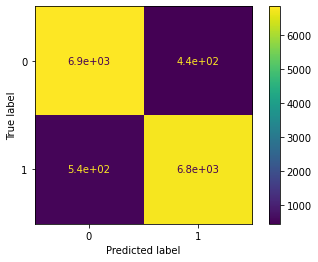

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost_classifier = AdaBoostClassifier( )
AdaBoost_classifier.fit(X_train, y_train)
Y_pred= AdaBoost_classifier.predict(X_test)
plot_confusion_matrix(AdaBoost_classifier,X_test,y_test)
print( "AdaBoostClassifier accuracy : %" + str(np.round(accuracy_score(y_test,Y_pred)*100,3)))

accuracies = cross_val_score(estimator = AdaBoost_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy by k-Fold Cross Validation: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

XGBClassifier accuracy : %94.637
Accuracy by k-Fold Cross Validation: 94.59 %
Standard Deviation: 0.28 %


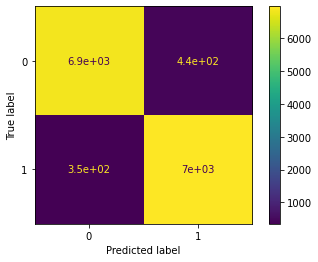

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
Y_pred= xgb_classifier.predict(X_test)
plot_confusion_matrix(xgb_classifier,X_test,y_test)
print( "XGBClassifier accuracy : %" + str(np.round(accuracy_score(y_test,Y_pred)*100,3)))

accuracies = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy by k-Fold Cross Validation: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Tree accuracy : %92.244
Accuracy by k-Fold Cross Validation: 91.97 %
Standard Deviation: 0.36 %


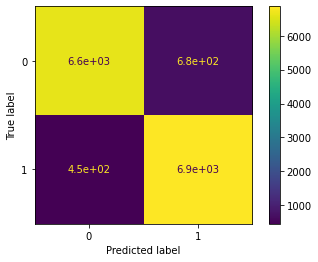

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier( max_leaf_nodes=100) 
DTC.fit(X_train, y_train)
Y_pred = DTC.predict(X_test)
plot_confusion_matrix(DTC,X_test,y_test)
print( "Tree accuracy : %" + str(np.round(accuracy_score(y_test,Y_pred)*100,3)))

accuracies = cross_val_score(estimator = DTC, X = X_train, y = y_train, cv = 10)
print("Accuracy by k-Fold Cross Validation: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Hard Voting Classifier Accuracy : % 92.059
Accuracy by k-Fold Cross Validation: 92.10 %
Standard Deviation: 0.45 %
Soft Voting Classifier Accuracy : % 92.668
Accuracy by k-Fold Cross Validation: 92.70 %
Standard Deviation: 0.57 %


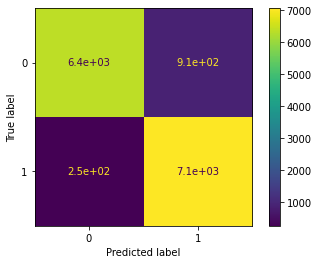

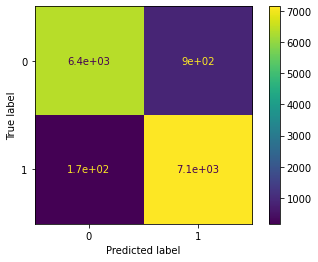

In [ ]:
from sklearn.ensemble import VotingClassifier

VC = VotingClassifier(estimators=[('Tree',DTC),('knn',KNeighbors_classifier),('Logistic',lg_classifier)],voting='hard') 
VC.fit(X_train, y_train)
Y_pred = VC.predict(X_test)
plot_confusion_matrix(VC,X_test,y_test)
print( "Hard Voting Classifier Accuracy : % " + str(np.round(accuracy_score(y_test,Y_pred)*100,3)))

accuracies = cross_val_score(estimator = VC, X = X_train, y = y_train, cv = 10)
print("Accuracy by k-Fold Cross Validation: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



VC = VotingClassifier(estimators=[('Tree',DTC),('knn',KNeighbors_classifier),('Logistic',lg_classifier)],voting='soft')
VC.fit(X_train, y_train)
Y_pred = VC.predict(X_test)
plot_confusion_matrix(VC,X_test,y_test)
print( "Soft Voting Classifier Accuracy : % " + str(np.round(accuracy_score(y_test,Y_pred)*100,3)))

accuracies = cross_val_score(estimator = VC, X = X_train, y = y_train, cv = 10)
print("Accuracy by k-Fold Cross Validation: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

StackingClassifier accuracy : %95.691
Accuracy by k-Fold Cross Validation: 95.35 %
Standard Deviation: 0.30 %


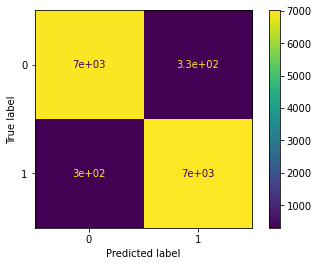

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [('xgb', XGBClassifier()),
             ('rf', RandomForestClassifier()),
             ('gb', GradientBoostingClassifier())]
stack = StackingClassifier(estimators=estimators)
stack.fit(X_train, y_train)
Y_pred= stack.predict(X_test)
plot_confusion_matrix(stack,X_test,y_test)
print( "StackingClassifier accuracy : %" + str(np.round(accuracy_score(y_test,Y_pred)*100,3)))

accuracies = cross_val_score(estimator = stack, X = X_train, y = y_train, cv = 10)
print("Accuracy by k-Fold Cross Validation: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

LogisticRegression accuracy : %86.628
Accuracy by k-Fold Cross Validation: 86.52 %
Standard Deviation: 0.39 %


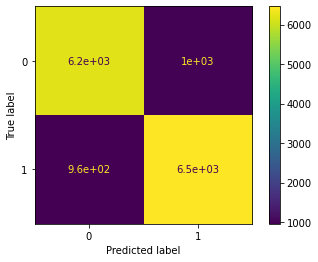

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_classifier = LogisticRegression(solver='liblinear')
lg_classifier.fit(X_train, y_train)
Y_pred= lg_classifier.predict(X_test)
plot_confusion_matrix(lg_classifier,X_test,y_test)
print( "LogisticRegression accuracy : %" + str(np.round(accuracy_score(y_test,Y_pred)*100,3)))

accuracies = cross_val_score(estimator = lg_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy by k-Fold Cross Validation: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

KNeighborsClassifier accuracy : %92.613
Accuracy by k-Fold Cross Validation: 92.44 %
Standard Deviation: 0.39 %


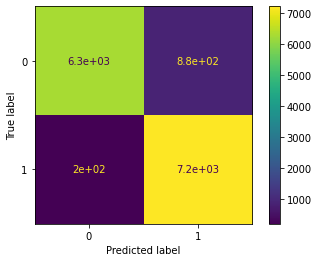

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeighbors_classifier = KNeighborsClassifier(n_neighbors= 5 )
KNeighbors_classifier.fit(X_train, y_train)
Y_pred= KNeighbors_classifier.predict(X_test)
plot_confusion_matrix(KNeighbors_classifier,X_test,y_test)
print( "KNeighborsClassifier accuracy : %" + str(np.round(accuracy_score(y_test,Y_pred)*100,3)))

accuracies = cross_val_score(estimator = KNeighbors_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy by k-Fold Cross Validation: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

SVC accuracy : %92.141
Accuracy by k-Fold Cross Validation: 92.27 %
Standard Deviation: 0.45 %


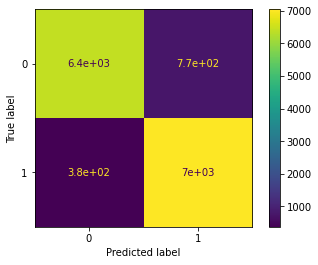

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(X_train, y_train)
Y_pred= svm_classifier.predict(X_test)
plot_confusion_matrix(svm_classifier,X_test,y_test)
print( "SVC accuracy : %" + str(np.round(accuracy_score(y_test,Y_pred)*100,3)))

accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy by k-Fold Cross Validation: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

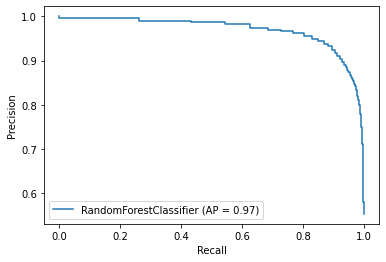

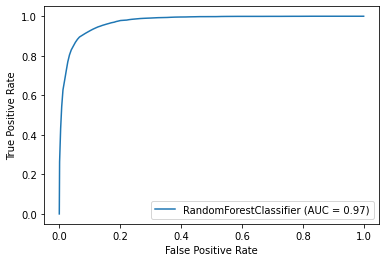

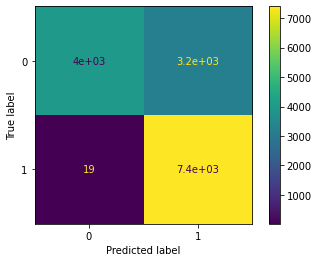

In [ ]:
#RandomForest Classifier highest accuracy

plot_precision_recall_curve(RF_classifier,X_test,y_test)
plot_roc_curve(RF_classifier,X_test,y_test)
plot_confusion_matrix(RF_classifier,X_test,y_test)